**Bernadus Sergio Halim - 0706022210056**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [77]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load Dataset

In [78]:
# Load Dataset
url = "https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/bank.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())




   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




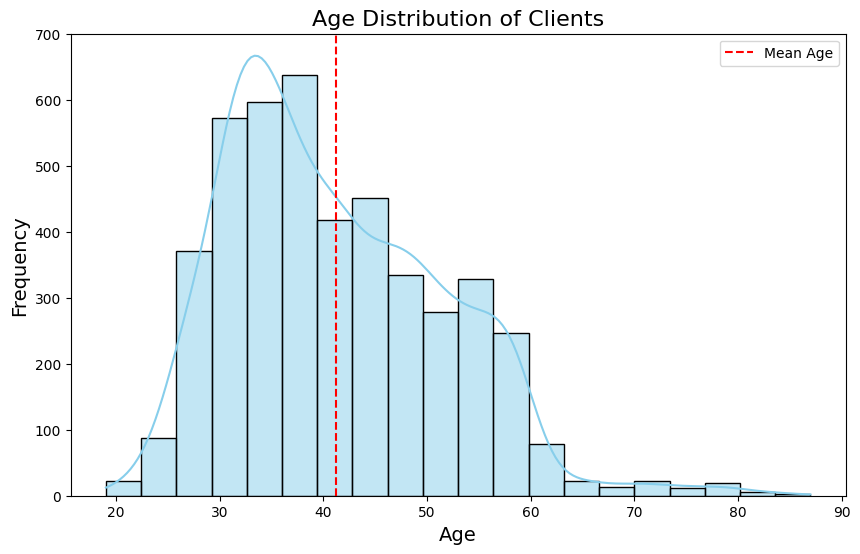

In [79]:
# Step 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Clients", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(data['age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.legend()
plt.show()


<ipython-input-80-7b4768cb9078>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='job', order=data['job'].value_counts().index, palette='Set2')


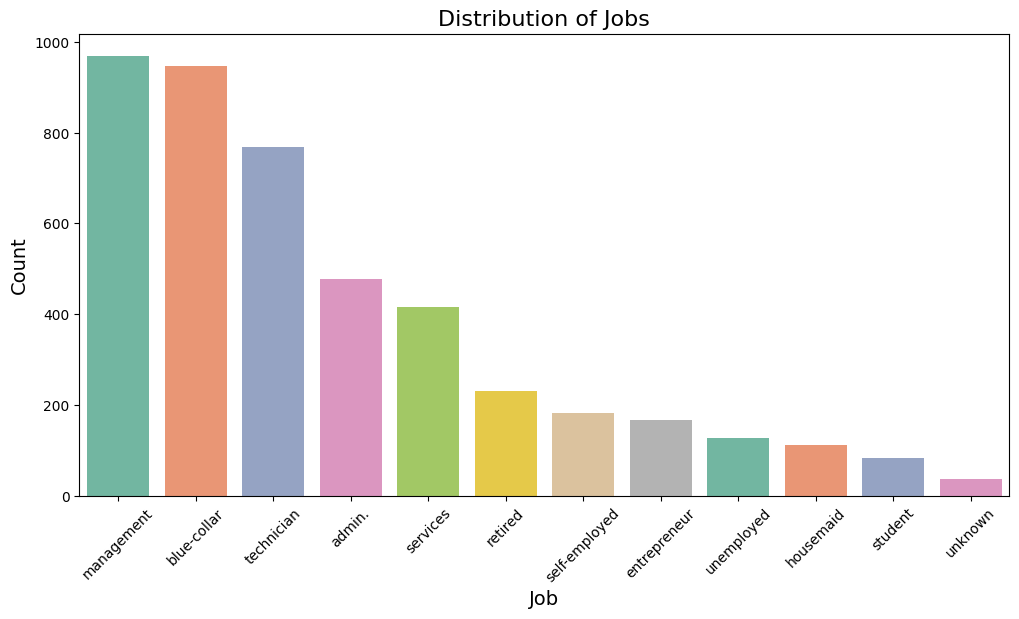

In [80]:
# Step 2: Job Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job', order=data['job'].value_counts().index, palette='Set2')
plt.title("Distribution of Jobs", fontsize=16)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


<ipython-input-81-1f4dd9c9d374>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='y', palette='pastel')


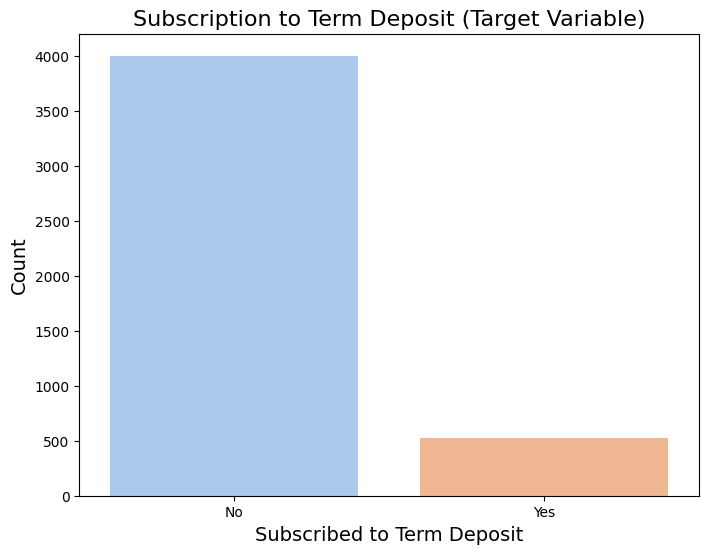

In [81]:
# Step 3: Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='y', palette='pastel')
plt.title("Subscription to Term Deposit (Target Variable)", fontsize=16)
plt.xlabel("Subscribed to Term Deposit", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


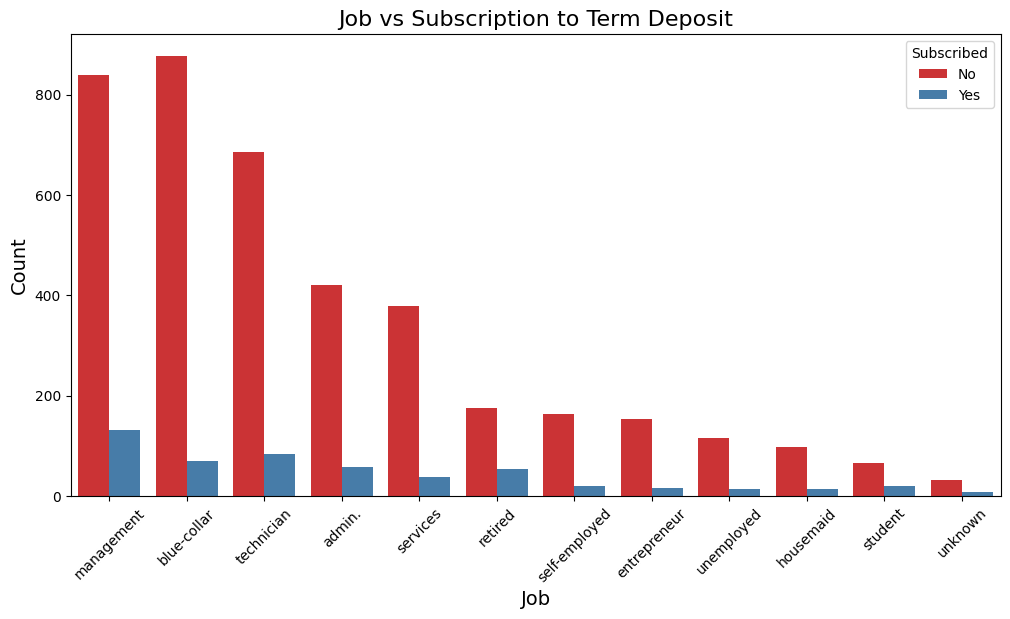

In [82]:
# Step 4: Relationship between Job and Target Variable
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job', hue='y', order=data['job'].value_counts().index, palette='Set1')
plt.title("Job vs Subscription to Term Deposit", fontsize=16)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()


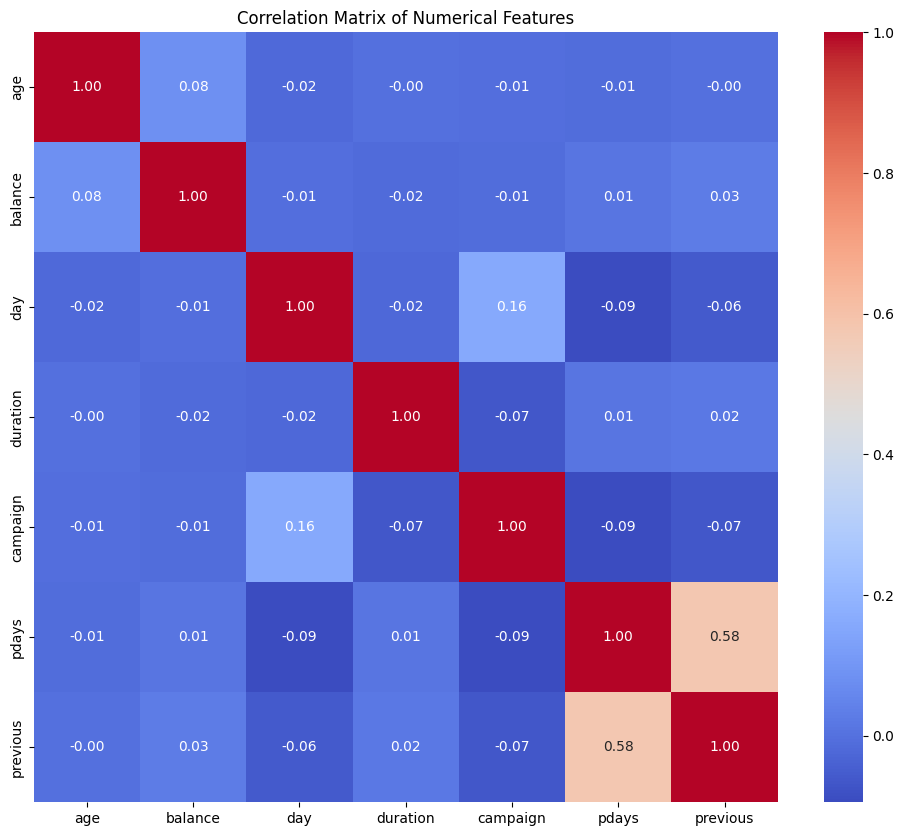

In [86]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Machine Learning

In [46]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting features and target variable
X = data.drop('y_yes', axis=1)  # Assuming 'y' is encoded as 'y_yes'
y = data['y_yes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [88]:
# Random Forest Classifier
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [89]:

# Predict test set results
y_pred_rf = rf_model.predict(X_test)



In [90]:
# Check accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")



Random Forest Accuracy: 0.7652


In [91]:
# Confusion matrix and classification report
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:\n", confusion_rf)
print("Random Forest Classification Report:\n", classification_rf)

Random Forest Confusion Matrix:
 [[160   7]
 [ 47  16]]
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.96      0.86       167
        True       0.70      0.25      0.37        63

    accuracy                           0.77       230
   macro avg       0.73      0.61      0.61       230
weighted avg       0.75      0.77      0.72       230



In [95]:

Results and conclusion
print("## Results and Conclusion")
print("The Random Forest model achieved an accuracy of", accuracy_rf, "on the test dataset.")
print("The confusion matrix and classification report provide further insights into the model's performance.")
print("Overall, the Random Forest model demonstrates promising results for predicting the subscription to a term deposit in the bank marketing campaign.")
print("Further analysis and model optimization could potentially improve the performance.")


## Results and Conclusion
The Random Forest model achieved an accuracy of 0.7652173913043478 on the test dataset.
The confusion matrix and classification report provide further insights into the model's performance.
Overall, the Random Forest model demonstrates promising results for predicting the subscription to a term deposit in the bank marketing campaign.
Further analysis and model optimization could potentially improve the performance.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [92]:
# Gradient Boosting Classifier
# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)



GradientBoostingClassifier(random_state=42)

In [96]:
# Predict test set results
y_pred_gb = gb_model.predict(X_test)




In [97]:
# Check accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")




Gradient Boosting Accuracy: 0.8000


In [94]:
# Confusion matrix and classification report
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classification_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Confusion Matrix:\n", confusion_gb)
print("Gradient Boosting Classification Report:\n", classification_gb)

Gradient Boosting Confusion Matrix:
 [[156  11]
 [ 35  28]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.93      0.87       167
        True       0.72      0.44      0.55        63

    accuracy                           0.80       230
   macro avg       0.77      0.69      0.71       230
weighted avg       0.79      0.80      0.78       230



In [101]:
# Results and conclusion

print("\n## Gradient Boosting Results and Conclusion")
print("The Gradient Boosting model achieved an accuracy of", accuracy_gb, "on the test dataset.")
print("The confusion matrix and classification report provide further insights into the model's performance.")
print("Overall, the Gradient Boosting model demonstrates promising results for predicting the subscription to a term deposit in the bank marketing campaign.")
print("Further analysis and model optimization could potentially improve the performance.")

# Comparing the models
print("\n## Model Comparison")
if accuracy_rf > accuracy_gb:
  print("The Random Forest model performed slightly better than the Gradient Boosting model in this case.")
else:
  print("The Gradient Boosting model performed slightly better than the Random Forest model in this case.")


## Gradient Boosting Results and Conclusion
The Gradient Boosting model achieved an accuracy of 0.8 on the test dataset.
The confusion matrix and classification report provide further insights into the model's performance.
Overall, the Gradient Boosting model demonstrates promising results for predicting the subscription to a term deposit in the bank marketing campaign.
Further analysis and model optimization could potentially improve the performance.

## Model Comparison
The Gradient Boosting model performed slightly better than the Random Forest model in this case.
